In [392]:
import tensorflow as tf 
import pandas as pd
import numpy as np
import sys
import os
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Import the function
sys.path.append(os.path.abspath('../src/data'))
from extract_for_model_new import extract_time_series
from extract_for_model_new import scale_time_series_all
%matplotlib inline

## Get the file and the features in order to extract the data
    This will give a dataframe with all the data scaled using StandardScaler
    We can change to any scaler 

In [447]:
input_path = '/home/reference/data_interim/software_private_annual_revised_income_statements_INTERIM.csv'
#features   = [ 'IQ_TOTAL_OTHER_OPER','IQ_NI','IQ_GP',
#              'IQ_OPER_INC','IQ_EBITDA','IQ_EARNING_CO','IQ_OTHER_OPER',
#              'IQ_INC_TAX','IQ_NET_INTEREST_EXP','IQ_TOTAL_REV']
features = [ 'IQ_EBIT',
              'IQ_TOTAL_OTHER_OPER',
              'IQ_OPER_INC','IQ_TOTAL_REV']
ids        = []
year_min   = 2014
steps      = -1
unitshift = 0
train_df, test_df = extract_time_series(input_path = input_path,
                                   features = features,
                                    
                                      steps = steps,
                                 unitshift = 0
                                 
                                
                                )
dataset = pd.concat([train_df,test_df])


dataset_scale = scale_time_series_all(dataset,features,'standard')

Size BEFORE dropping NA: (1278, 7)
Size AFTER dropping NA: (1264, 7)
TEST  set size: (276, 7)
TRAIN set size: (988, 7)
TEST is 22% of all available datapoints


In [448]:
input_path_bal = '/home/reference/data_interim/software_private_annual_balance_sheets_INTERIM.csv'
#features   = [ 'IQ_TOTAL_OTHER_OPER','IQ_NI','IQ_GP',
#              'IQ_OPER_INC','IQ_EBITDA','IQ_EARNING_CO','IQ_OTHER_OPER',
#              'IQ_INC_TAX','IQ_NET_INTEREST_EXP','IQ_TOTAL_REV']
features_bal = [ 'IQ_AR','IQ_RE','IQ_TOTAL_ASSETS','IQ_TOTAL_CA']
ids        = []
year_min   = 2014
steps      = -1
unitshift = 0
train_bal_df, test_bal_df = extract_time_series(input_path = input_path_bal,
                                   features = features_bal,
                                    
                                      steps = steps,
                                 unitshift = 0
                                 
                                
                                )
dataset_bal = pd.concat([train_bal_df,test_bal_df])


dataset_scale_bal = scale_time_series_all(dataset_bal,features_bal,'standard')

Size BEFORE dropping NA: (1286, 7)
Size AFTER dropping NA: (686, 7)
TEST  set size: (157, 7)
TRAIN set size: (529, 7)
TEST is 23% of all available datapoints


In [449]:
dataset_scale_bal.head()

,company,year,quarter,IQ_AR,IQ_RE,IQ_TOTAL_ASSETS,IQ_TOTAL_CA
0,IQ102267046,2014.0,Q4,-0.160252,-0.067808,-0.118604,-0.136150
1,IQ102267046,2015.0,Q4,-0.141929,-0.067693,-0.116147,-0.129703
2,IQ102267046,2016.0,Q4,-0.105774,-0.066594,-0.111342,-0.117449
3,IQ105654219,2014.0,Q4,-0.187444,-0.066665,-0.119392,-0.139342
4,IQ105654219,2015.0,Q4,-0.187901,-0.065712,-0.118338,-0.137160


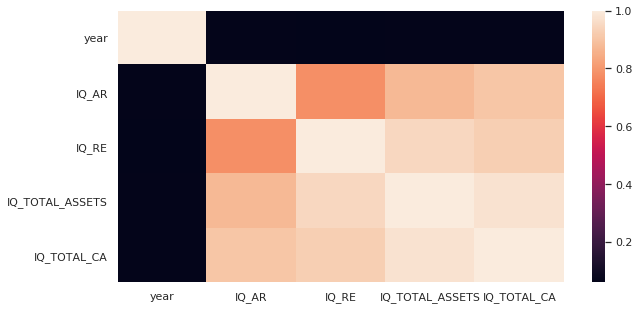

In [450]:
sns.set_context("notebook")
#sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
sns.heatmap(dataset_scale_bal.corr())

In [451]:
dataset_scale = dataset_scale.merge(dataset_scale_bal,on = ['company','year'])

In [452]:
dataset_scale = dataset_scale.drop(['quarter_x','quarter_y'],axis=1)

In [453]:
dataset_scale.head()

,company,year,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV,IQ_AR,IQ_RE,IQ_TOTAL_ASSETS,IQ_TOTAL_CA
0,IQ102267046,2014.0,-0.052560,-0.134340,-0.052560,-0.129002,-0.160252,-0.067808,-0.118604,-0.136150
1,IQ102267046,2015.0,-0.057405,-0.127777,-0.057405,-0.123066,-0.141929,-0.067693,-0.116147,-0.129703
2,IQ102267046,2016.0,-0.046751,-0.114346,-0.046751,-0.107296,-0.105774,-0.066594,-0.111342,-0.117449
3,IQ105654219,2014.0,-0.058475,-0.130681,-0.058475,-0.126681,-0.187444,-0.066665,-0.119392,-0.139342
4,IQ105654219,2015.0,-0.054590,-0.127436,-0.054590,-0.124959,-0.187901,-0.065712,-0.118338,-0.137160


In [454]:
dataset_scale.describe()

,year,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV,IQ_AR,IQ_RE,IQ_TOTAL_ASSETS,IQ_TOTAL_CA
count,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000
mean,2016.141580,-0.008535,-0.053215,-0.008535,-0.047237,-0.032689,-0.021950,-0.025049,-0.021907
std,1.394847,0.417106,0.190697,0.417106,0.292763,0.867957,0.752083,0.820434,0.898983
min,2014.000000,-2.632563,-0.147185,-2.632563,-0.139733,-0.198249,-1.494054,-0.123105,-0.149078
25%,2015.000000,-0.074623,-0.124763,-0.074623,-0.126445,-0.187996,-0.078629,-0.118916,-0.141434
50%,2016.000000,-0.049006,-0.103094,-0.049006,-0.114075,-0.177065,-0.067126,-0.114896,-0.133019
75%,2017.000000,-0.013516,-0.056461,-0.013516,-0.081114,-0.149395,-0.062344,-0.101497,-0.110821
max,2018.000000,4.323007,2.133816,4.323007,2.641439,9.469098,16.475329,13.576927,16.424375


## Representation of the data in two dimensions

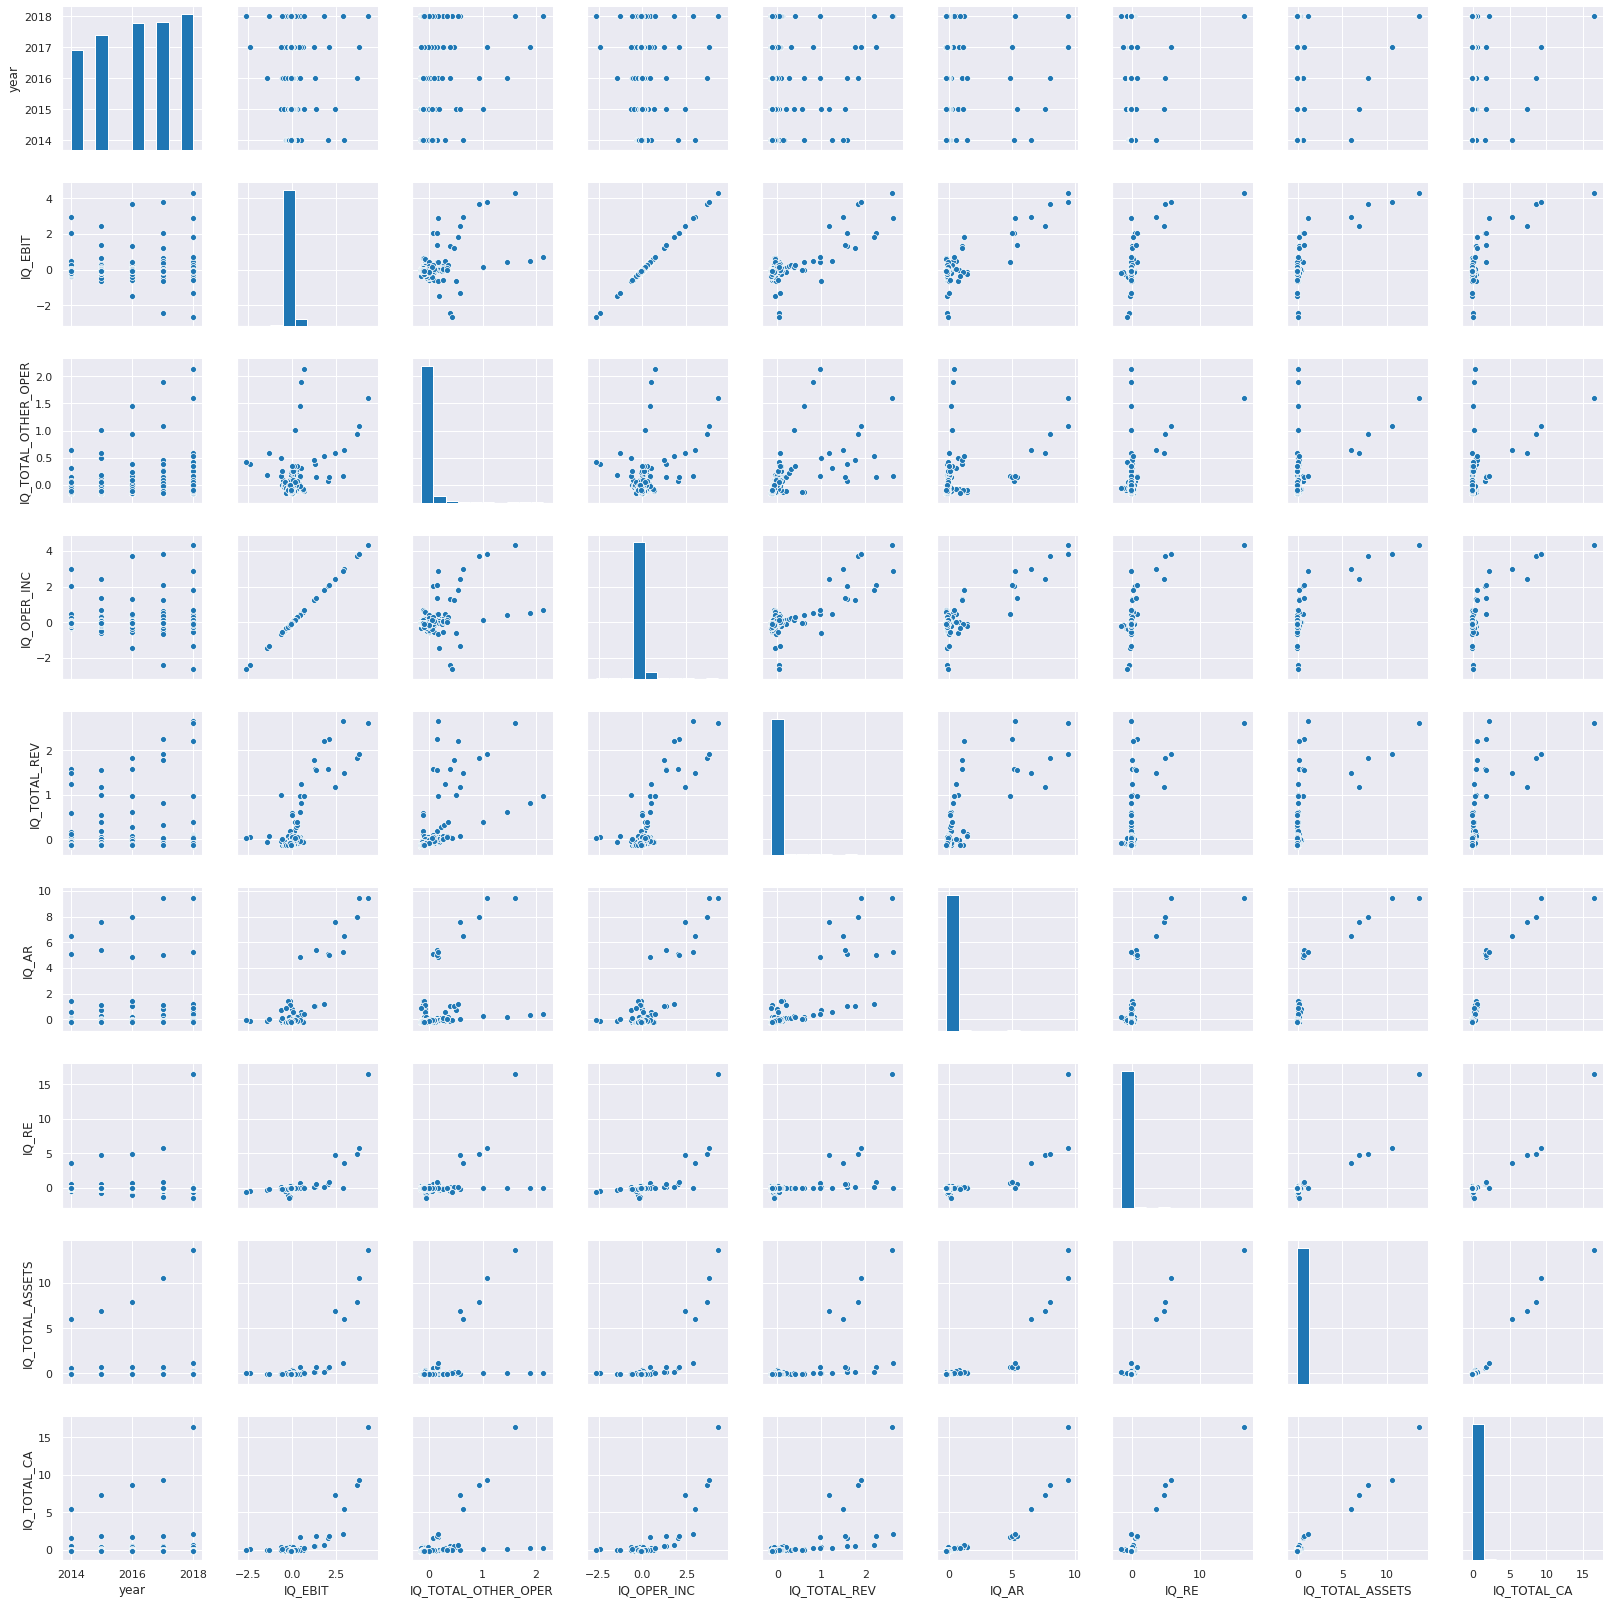

In [455]:
sns.set_context("notebook")
sns.pairplot(dataset_scale)

# Cluster the data using the  features described above
# Calulate the inertia and the silhouette score 
# Silhouette score : Cohesion (how close points in a cluster are relative to each other) 
# Silhouette score :  Separation (how far the clusters are relative to each other).
# changing the number of clusters

In [456]:

inertia = [] # List of the inertia score for each cluster and plot the elbow curve(a measure of how internally coherent clusters are.)
sil = [] # List the silhouette score
    

X = dataset_scale.loc[:,'IQ_EBIT':]
for i in range(2,11):
    #plt.figure(figsize=(6, 6))
    
    # Predicting the clusters
    
    y_pred = KMeans(n_clusters=i, init = 'random', random_state = 2)
    y_pred.fit(X)
    cluster_label = y_pred.predict(X)
    inertia.append([i,y_pred.inertia_])
    sil.append((i, silhouette_score(X, cluster_label)))
    #print(type(cluster_label))from sklearn.metrics import silhouette_samples, silhouette_score




Text(0.5, 1.0, 'Silhouetter Score Curve')

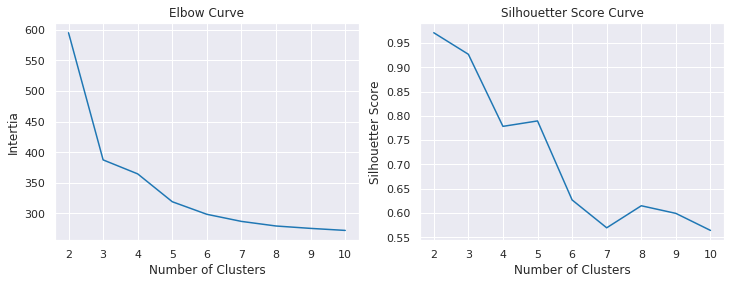

In [457]:
sns.set_context("notebook")
fig, ax = plt.subplots(1,2, figsize=(12,4))
# Plotting Elbow Curve
x_iner = [x[0] for x in inertia]
y_iner  = [x[1] for x in inertia]
ax[0].plot(x_iner, y_iner)
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Intertia')
ax[0].set_title('Elbow Curve')


# Plotting Silhouetter Score
x_sil = [x[0] for x in sil]
y_sil  = [x[1] for x in sil]
ax[1].plot(x_sil, y_sil)
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouetter Score')
ax[1].set_title('Silhouetter Score Curve')

In [467]:
# We retain 3 clusters due to inertia and the silhouette curve
n_former_cluster = 4
y_pred = KMeans(n_clusters=4, init = 'random', random_state = 7)
y_pred.fit(X)
cluster_label = y_pred.predict(X)


In [468]:
for i in range(4):
    print(i,len(cluster_label[cluster_label==i]))

0 5
1 5
2 13
3 648


In [469]:
clusters  = pd.Series(y_pred.labels_)
dataset_scale = dataset_scale.assign(centroids=clusters.values)


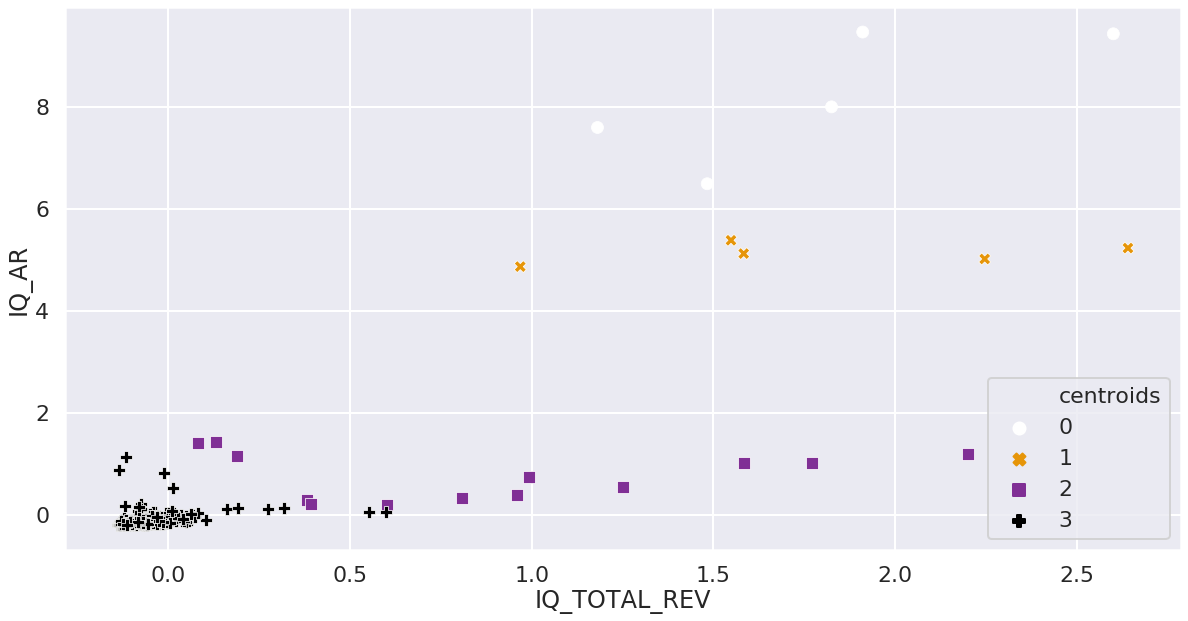

In [470]:
sns.set_context("poster")
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="IQ_TOTAL_REV", y="IQ_AR", hue="centroids",style = "centroids",palette =  "CMRmap_r",data = dataset_scale)

# Provide a dictionary to the palette argument
#ax = sns.scatterplot( x="IQ_EBIT", y="IQ_TOTAL_REV", data=dataset_choosen, fit_reg=False , hue = "centroids" , legend=False, palette=dict(0="#9b59b6", 1="#3498db", 2="#95a5a6" 3 = "#96a5B6"))
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
#sns.plt.show()

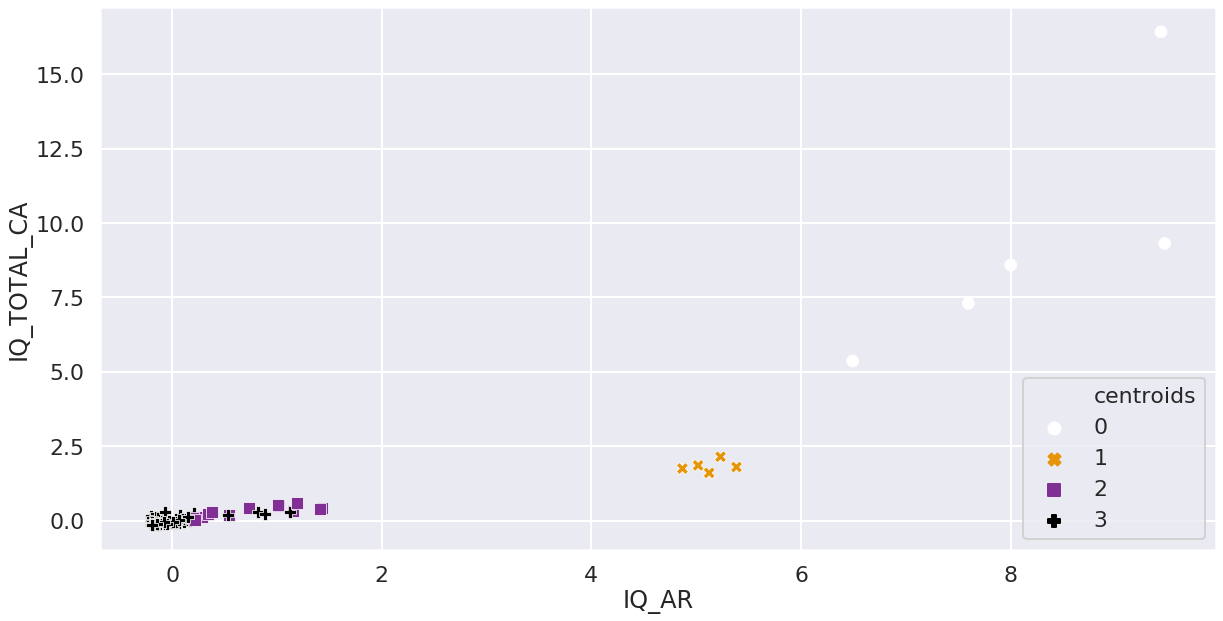

In [488]:
sns.set_context("poster")
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="IQ_AR", y="IQ_TOTAL_CA", hue="centroids",style = "centroids",palette =  "CMRmap_r",data = dataset_scale)

# Provide a dictionary to the palette argument
#ax = sns.scatterplot( x="IQ_EBIT", y="IQ_TOTAL_REV", data=dataset_choosen, fit_reg=False , hue = "centroids" , legend=False, palette=dict(0="#9b59b6", 1="#3498db", 2="#95a5a6" 3 = "#96a5B6"))
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
#sns.plt.show()

In [489]:
dataset_scale.head()

,company,year,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV,IQ_AR,IQ_RE,IQ_TOTAL_ASSETS,IQ_TOTAL_CA,centroids
0,IQ102267046,2014.0,-0.052560,-0.134340,-0.052560,-0.129002,-0.160252,-0.067808,-0.118604,-0.136150,3
1,IQ102267046,2015.0,-0.057405,-0.127777,-0.057405,-0.123066,-0.141929,-0.067693,-0.116147,-0.129703,3
2,IQ102267046,2016.0,-0.046751,-0.114346,-0.046751,-0.107296,-0.105774,-0.066594,-0.111342,-0.117449,3
3,IQ105654219,2014.0,-0.058475,-0.130681,-0.058475,-0.126681,-0.187444,-0.066665,-0.119392,-0.139342,3
4,IQ105654219,2015.0,-0.054590,-0.127436,-0.054590,-0.124959,-0.187901,-0.065712,-0.118338,-0.137160,3


1.0
[1.         0.95982143 0.97309417]
Accuracy score: 0.9940476190476191


/home/mbousso/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[Text(1488.0, 1956.96, 'X[7] <= 3.614\nentropy = 0.71\nsamples = 503\nvalue = [[1736.015, 857.695]\n[1736.015, 857.695]\n[1748.047, 845.663]\n[2561.052, 32.658]]'),
 Text(1116.0, 1522.0800000000002, 'X[5] <= 0.396\nentropy = 0.534\nsamples = 499\nvalue = [[1736.015, 0.0]\n[878.321, 857.695]\n[890.352, 845.663]\n[1703.358, 32.658]]'),
 Text(744.0, 1087.2, 'X[4] <= 0.177\nentropy = 0.115\nsamples = 495\nvalue = [[878.321, 0.0]\n[878.321, 0.0]\n[32.658, 845.663]\n[845.663, 32.658]]'),
 Text(372.0, 652.3200000000002, 'entropy = -0.0\nsamples = 480\nvalue = [[32.388, 0.0]\n[32.388, 0.0]\n[32.388, 0.0]\n[0.0, 32.388]]'),
 Text(1116.0, 652.3200000000002, 'X[3] <= 0.047\nentropy = 0.002\nsamples = 15\nvalue = [[845.933, 0.0]\n[845.933, 0.0]\n[0.27, 845.663]\n[845.663, 0.27]]'),
 Text(744.0, 217.44000000000005, 'entropy = 0.0\nsamples = 4\nvalue = [[0.27, 0.0]\n[0.27, 0.0]\n[0.27, 0.0]\n[0.0, 0.27]]'),
 Text(1488.0, 217.44000000000005, 'entropy = 0.0\nsamples = 11\nvalue = [[845.663, 0.0]\n[845

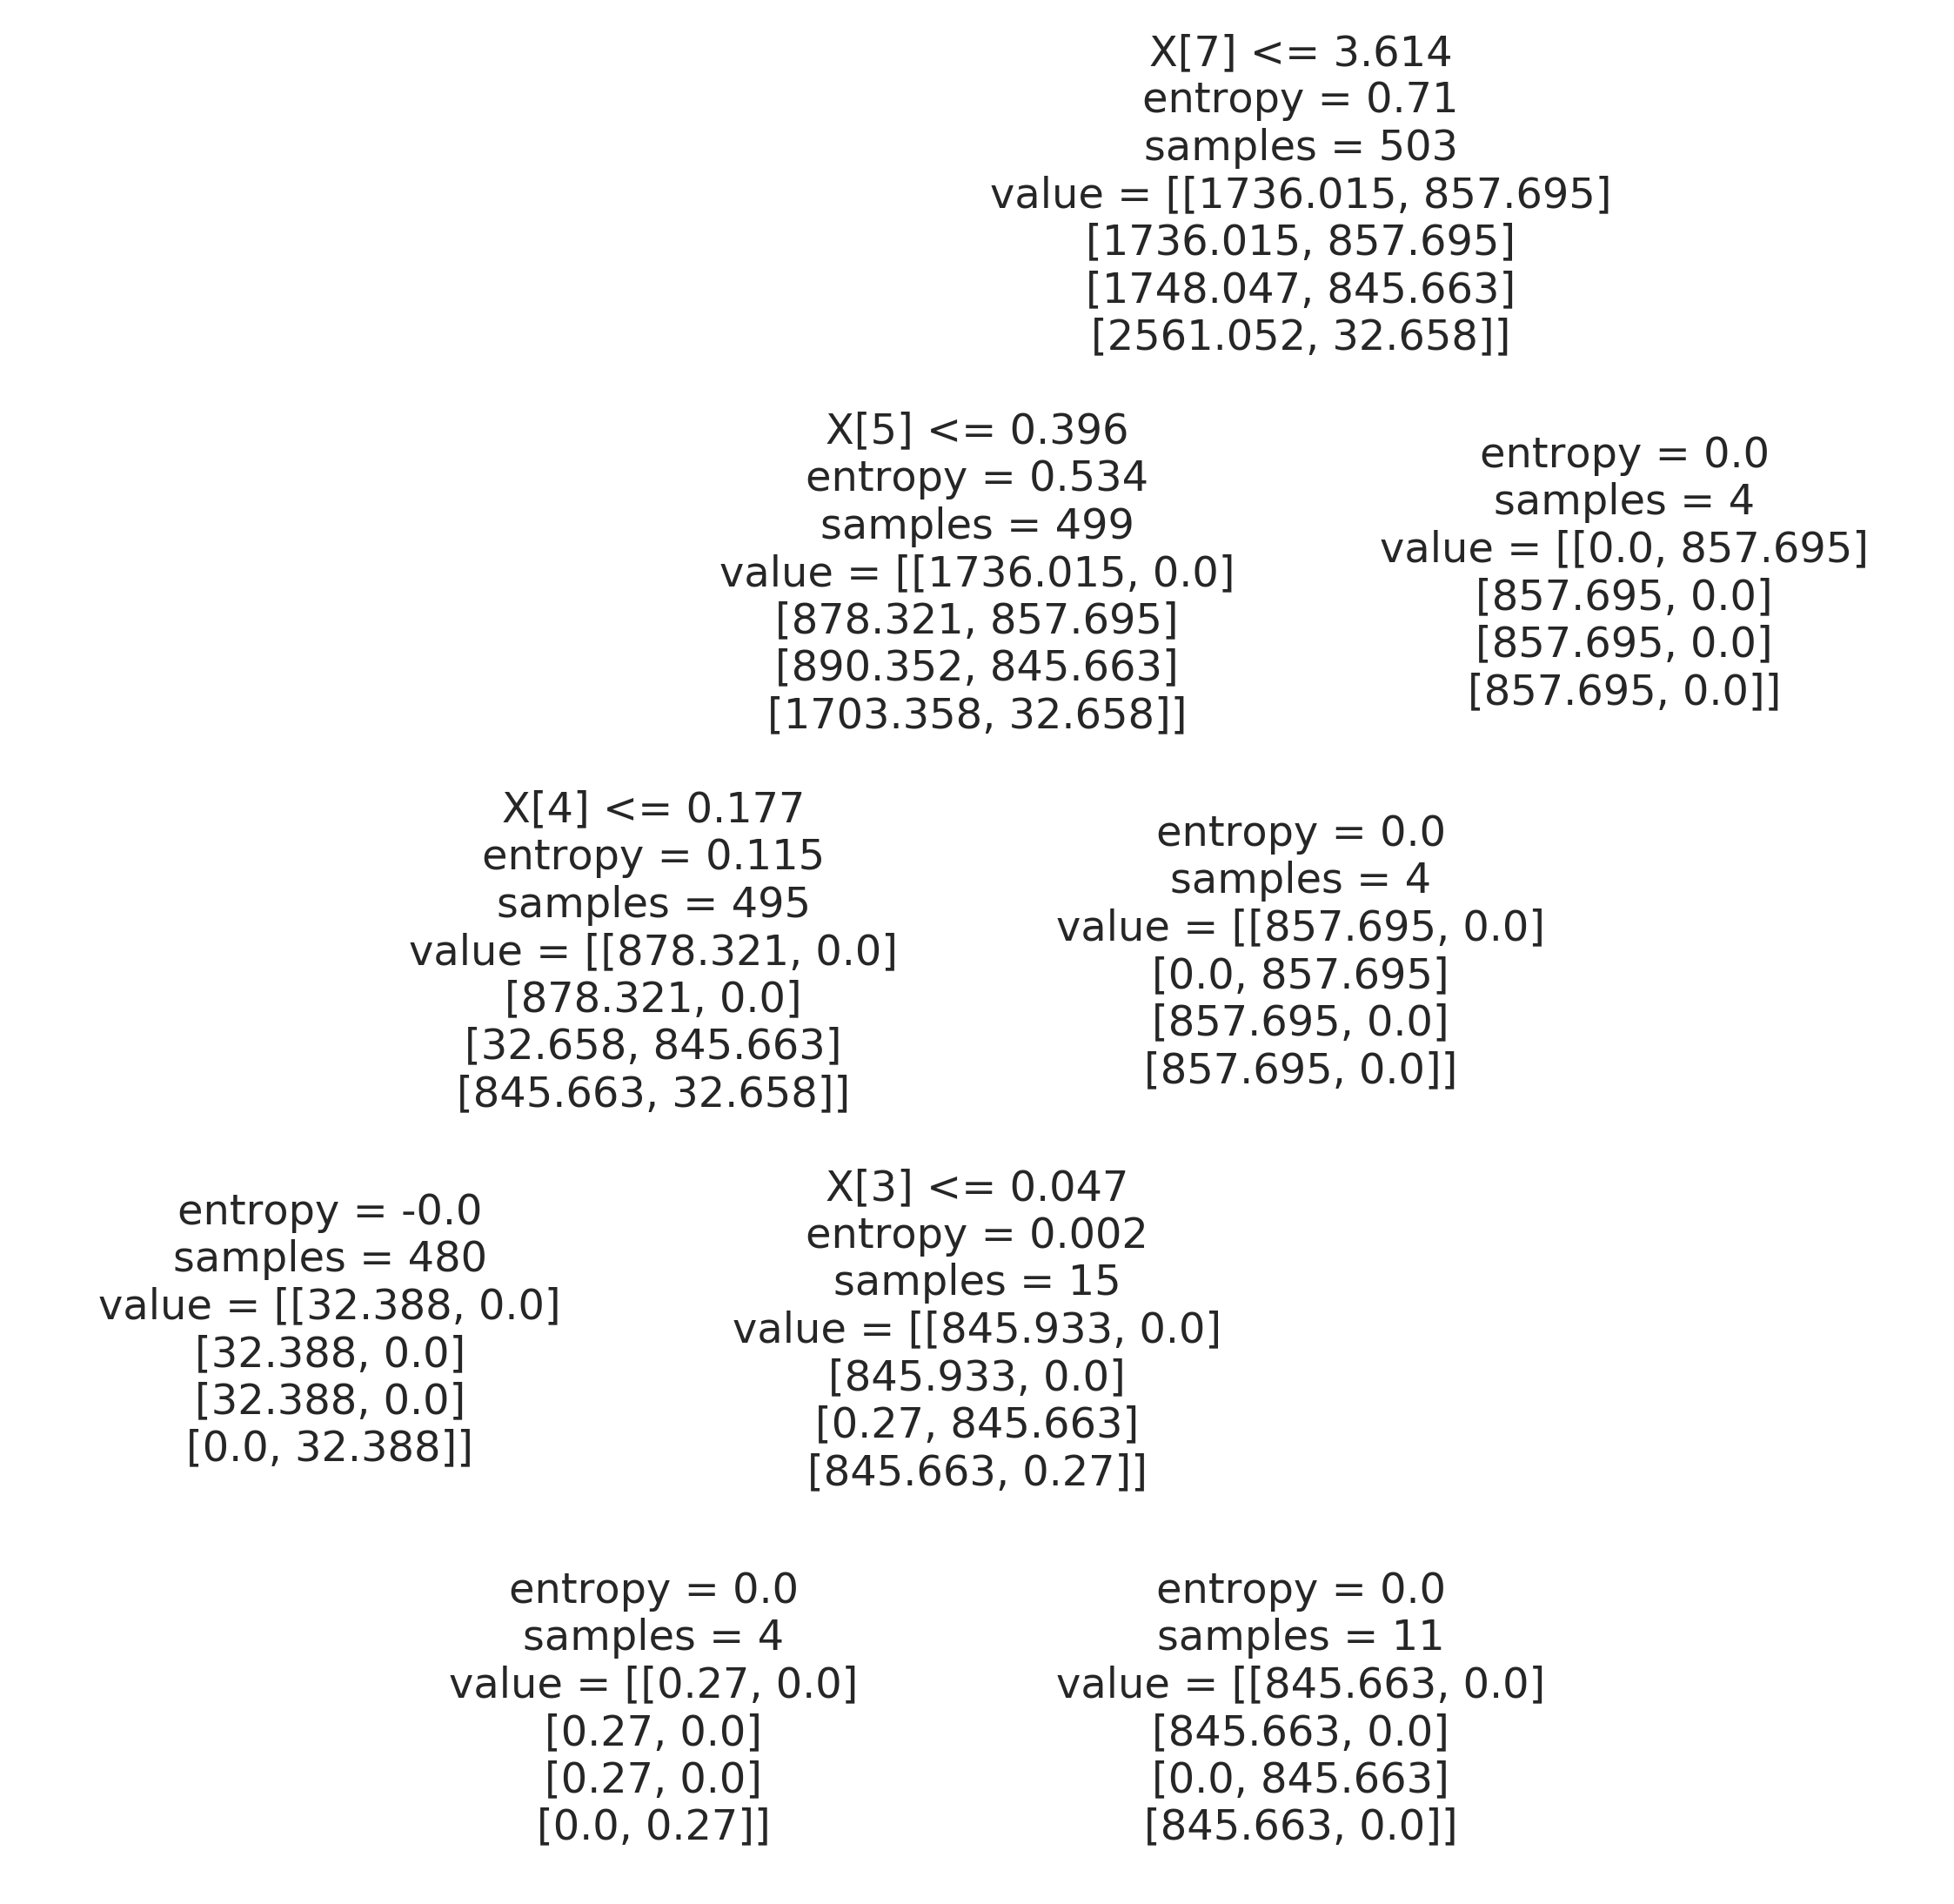

In [490]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import tree
plt.rcParams["figure.figsize"]=40,40
X_scale  = dataset_scale.loc[:,"IQ_EBIT":"IQ_TOTAL_CA"]
y_scale = pd.get_dummies(dataset_scale.loc[:,"centroids"])
X_scale_train,X_scale_test,y_scale_train,y_scale_test = train_test_split(X_scale,y_scale,random_state=0)
clf = tree.DecisionTreeClassifier(class_weight="balanced",criterion = "entropy",max_leaf_nodes = 6,random_state = 0)
clf.fit(X_scale_train, y_scale_train)
print(clf.score(X_scale_train,y_scale_train))
print(cross_val_score(clf,X_scale,y_scale))

y_pred_new = clf.predict(X_scale_test)
print("Accuracy score:",  metrics.accuracy_score(y_scale_test,y_pred_new))
tree.plot_tree(clf) 

In [491]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names= dataset_scale.columns[2:10],  
                      class_names= dataset_scale.centroids,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render("decisiontreeincome")

'decisiontreeincome.pdf'

In [492]:
# Count the number of element of a cluster depending 
def count_num_element(df,list_index,num_cluster,value = 1):
    return np.count_nonzero(df.loc[list_index][num_cluster]==value)
#np.count_nonzero(y_scale_train.loc[dataset_index_02][0]==1)
#count_num_element(y_scale_train,dataset_index_02,0)

In [493]:
def count_cluster_num_element(df, cluster_num):
    return len(df[df[cluster_num]== 1])
print("cluster 0: ",count_cluster_num_element(y_scale_train, 0))
print("cluster 1: ",count_cluster_num_element(y_scale_train, 1))
print("cluster 2: ",count_cluster_num_element(y_scale_train, 2))
print("cluster 3: ",count_cluster_num_element(y_scale_train, 3))

cluster 0:  4
cluster 1:  4
cluster 2:  11
cluster 3:  484


In [494]:
# Get the index of points where IQ_NET_INTEREST_EXP > 3.064
dataset_index_00 = X_scale_train[X_scale_train['IQ_TOTAL_CA']> 3.614].index.tolist()
#print(dataset_index_00)

In [495]:
# Get the index of points where IQ_NET_INTEREST_EXP <= 3.064
dataset_index_01 = X_scale_train[X_scale_train['IQ_TOTAL_CA']<= 3.614].index.tolist()
print(len(dataset_index_01))

499


4


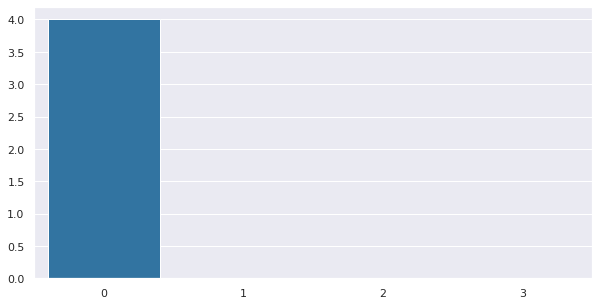

In [496]:
# Count for each cluster the number of points that have an IQ_NET_INTEREST_EXP > 3.064
num0 = count_num_element(y_scale_train,dataset_index_00,0)
print(num0)
num1 = count_num_element(y_scale_train,dataset_index_00,1)
num2 = count_num_element(y_scale_train,dataset_index_00,2)
num3 = count_num_element(y_scale_train,dataset_index_00,3)
sns.set_context("notebook")
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
sns.barplot(x = [0,1,2,3],y = [num0,num1,num2,num3])

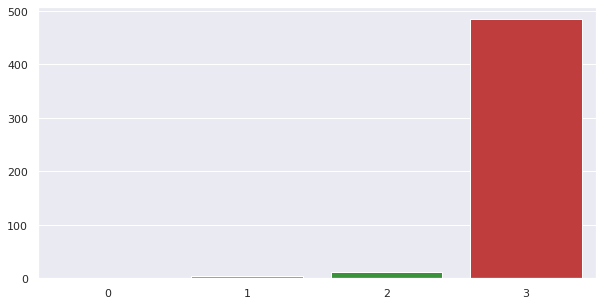

In [497]:
# Count for each cluster the number of points that have an IQ_NET_INTEREST_EXP <= 3.064
num0 = count_num_element(y_scale_train,dataset_index_01,0)
num1 = count_num_element(y_scale_train,dataset_index_01,1)
num2 = count_num_element(y_scale_train,dataset_index_01,2)
num3 = count_num_element(y_scale_train,dataset_index_01,3)
sns.set_context("notebook")
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
sns.barplot(x = [0,1,2,3],y = [num0,num1,num2,num3])

## Result 1 : IQ_TOTAL_CA divides the data in two sets:
    # those in cluster 0 with IQ_TOTAL_CA > 3.614
    # those in cluster 1 , 2 and 3 where IQ_TOTAL_CA <= 3.614

In [498]:
# Get the index of points where IQ_NET_INTEREST_EXP <= 3.614 and IQ_RE <= 0.396
dataset_index_02 = X_scale_train[X_scale_train['IQ_TOTAL_CA']<= 3.614][X_scale_train['IQ_RE']<= 0.396].index.tolist()

/home/mbousso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


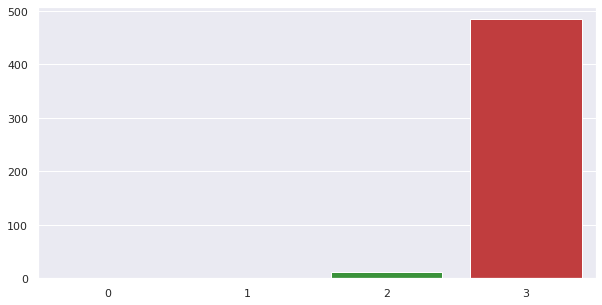

In [499]:
# Count for each cluster the number of points that have an IQ_NET_INTEREST_EXP > -3.405
num0 = count_num_element(y_scale_train,dataset_index_02,0)
num1 = count_num_element(y_scale_train,dataset_index_02,1)
num2 = count_num_element(y_scale_train,dataset_index_02,2)
num3 = count_num_element(y_scale_train,dataset_index_02,3)
sns.set_context("notebook")
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
sns.barplot(x = [0,1,2,3],y = [num0,num1,num2,num3])

## Result 2: All the points in cluster 1 are the points where IQ_TOTAL_CA <= 3.614 and IQ_RE > 0.396

In [502]:
#Get the index of points where IQ_TOTAL_CA <= 3.614 and IQ_RE <=.396
dataset_index_03 = X_scale_train[X_scale_train['IQ_TOTAL_CA']<= 3.614][X_scale_train['IQ_RE']<= 0.396][X_scale_train['IQ_AR']<= 0.177].index.tolist()

/home/mbousso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


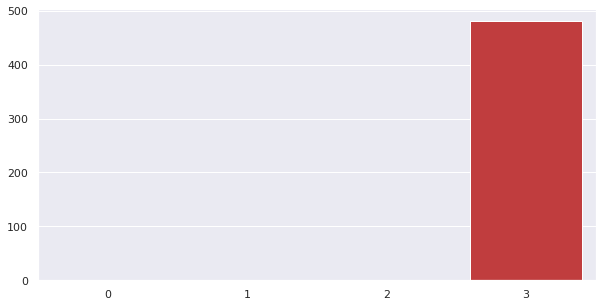

In [503]:
# Count for each cluster the number of points that have an IQ_NET_INTEREST_EXP > -3.405
num0 = count_num_element(y_scale_train,dataset_index_03,0)
num1 = count_num_element(y_scale_train,dataset_index_03,1)
num2 = count_num_element(y_scale_train,dataset_index_03,2)
num3 = count_num_element(y_scale_train,dataset_index_03,3)
sns.set_context("notebook")
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
sns.barplot(x = [0,1,2,3],y = [num0,num1,num2,num3])

## Result 3: All points in cluster 3 have a IQ_TOTAL_CA <= 3.614 and  IQ_RE <= 0.396 and IQ_AR <= 0.177

In [421]:
#Get the index of points where IQ_NET_INTEREST_EXP > -3.405 and IQ_AR < 2.345
dataset_index_04 = X_scale_train[X_scale_train['IQ_NET_INTEREST_EXP']<= 3.939][X_scale_train['IQ_AR']<= 5.939][X_scale_train['IQ_TOTAL_LIAB_EQUITY']> 0.383].index.tolist()

/home/mbousso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


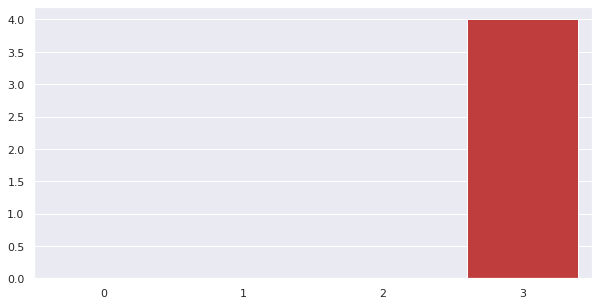

In [422]:
# Count for each cluster the number of points that have an IQ_NET_INTEREST_EXP > -3.405
num0 = count_num_element(y_scale_train,dataset_index_04,0)
num1 = count_num_element(y_scale_train,dataset_index_04,1)
num2 = count_num_element(y_scale_train,dataset_index_04,2)
num3 = count_num_element(y_scale_train,dataset_index_04,3)
sns.set_context("notebook")
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
sns.barplot(x = [0,1,2,3],y = [num0,num1,num2,num3])

## Companies in cluster 3 have IQ_NET_INTEREST_EXP <= 3.064 and IQ_AR <= 5.939 and IQ_LIAB_EQUITY > 0.383 

In [508]:
#Get the index of points where IQ_TOTAL_CA <= 3.614 and IQ_RE <=.396
dataset_index_05 = X_scale_train[X_scale_train['IQ_TOTAL_CA']<= 3.614][X_scale_train['IQ_RE']<= 0.396][X_scale_train['IQ_AR']> 0.177].index.tolist()

/home/mbousso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


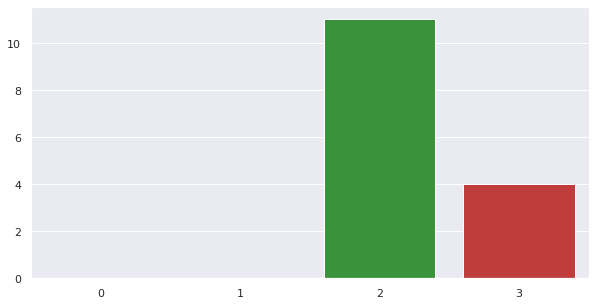

In [509]:
# Count for each cluster the number of points that have an IQ_NET_INTEREST_EXP > -3.405
num0 = count_num_element(y_scale_train,dataset_index_05,0)
num1 = count_num_element(y_scale_train,dataset_index_05,1)
num2 = count_num_element(y_scale_train,dataset_index_05,2)
num3 = count_num_element(y_scale_train,dataset_index_05,3)
sns.set_context("notebook")
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
sns.barplot(x = [0,1,2,3],y = [num0,num1,num2,num3])

## Result 4:  4 points in cluster 3   follow these rules:
    IQ_TOTAL_CA <= 3.614
    IQ_RE <= 0.396
    IQ_AR > 0.177
    IQ_TOTAL_REV <= 0.047
    

## Result 5:  All points in cluster 4   follow these rules:
    IQ_TOTAL_CA <= 3.614
    IQ_RE <= 0.396
    IQ_AR > 0.177
    IQ_TOTAL_REV > 0.047
    

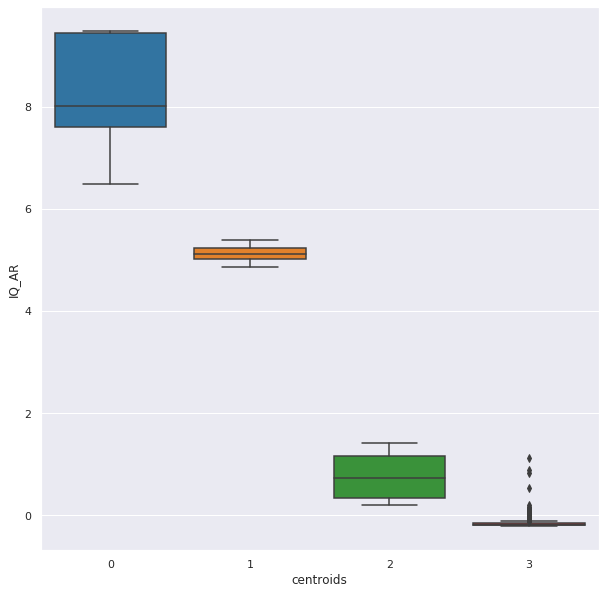

In [512]:
plt.rcParams["figure.figsize"]=10,10
sns.set_context("notebook")
sns.boxplot(x="centroids",y="IQ_AR", data = dataset_scale)

## Cluster the dense part where centroid is 3

In [517]:
#Get all the rows in the zero cluster
#Get all the index of these rows
#Build a dictionary wit indexes of these rows and zero
dataset_clust_new = dataset_scale[dataset_scale['centroids']==3]
dataset_index_0 = dataset_scale.index[dataset_scale['centroids']==3].tolist()
dict_index =  dict(zip(dataset_index_0,[0]*len(dataset_index_0)))
print(len(dict_index))

648


In [518]:
print(len(dataset_clust_new))

648


In [519]:
# changing the number of clusters
inertia_new = [] # List of the inertia score for each cluster and plot the elbow curve(a measure of how internally coherent clusters are.)
sil_new = [] # List the silhouette score
    

X_new = dataset_clust_new.loc[:,'IQ_EBIT':]
for i in range(2,11):
    #plt.figure(figsize=(6, 6))
    
    # Predicting the clusters
    
    y_pred_new = KMeans(n_clusters=i, random_state = 2)
    y_pred_new.fit(X_new)
    cluster_label = y_pred_new.predict(X_new)
    inertia_new.append([i,y_pred_new.inertia_])
    sil_new.append((i, silhouette_score(X_new, cluster_label)))
    #print(type(cluster_label))from sklearn.metrics import silhouette_samples, silhouette_score




Text(0.5, 1.0, 'Silhouetter Score Curve')

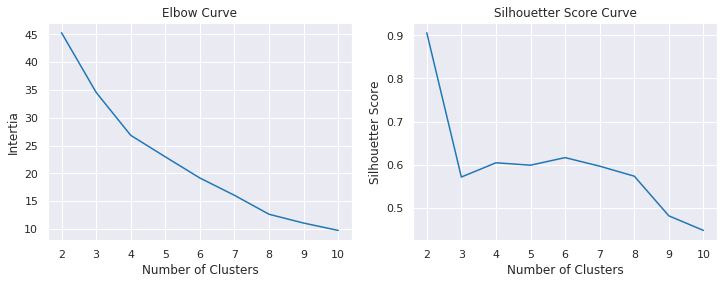

In [520]:
sns.set_context("notebook")
fig, ax = plt.subplots(1,2, figsize=(12,4))
# Plotting Elbow Curve
x_iner = [x[0] for x in inertia_new]
y_iner  = [x[1] for x in inertia_new]
ax[0].plot(x_iner, y_iner)
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Intertia')
ax[0].set_title('Elbow Curve')


# Plotting Silhouetter Score
x_sil = [x[0] for x in sil_new]
y_sil  = [x[1] for x in sil_new]
ax[1].plot(x_sil, y_sil)
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouetter Score')
ax[1].set_title('Silhouetter Score Curve')

In [521]:
# We retain 4 clusters due to inertia and the silhouette curve
y_pred_new = KMeans(n_clusters=4, init = 'random', random_state = 7)
y_pred_new.fit(X_new)
cluster_label_new = y_pred_new.predict(X_new)
#print(len(cluster_label_new))
#print(len(dict_index.keys()))
#Get the index of each element in X_new
def set_new_index(dict_index,cluster_label_new,n_clusters):
    L = list(dict_index.keys())
    for i in range(len(L)):
        if cluster_label_new[i] > 0:
            key = L[i]
            dict_index[key] = cluster_label_new[i] + n_clusters - 1
    return dict_index
dict_index = set_new_index(dict_index,cluster_label_new,n_former_cluster)    
#dict_index
#L = list(dict_index.keys())
#for i in range(len(L)):
#    if cluster_label_new[i] > 0:
#        key = L[i]
#        dict_index[key] = cluster_label_new[i]+3

In [522]:
for i in range(4):
    print(i,len(cluster_label_new[cluster_label_new == i]))


#sns.plt.show()

0 517
1 45
2 4
3 82


In [523]:
clusters  = pd.Series(y_pred_new.labels_)
dataset_clust_new = dataset_clust_new.assign(centroids=clusters.values)

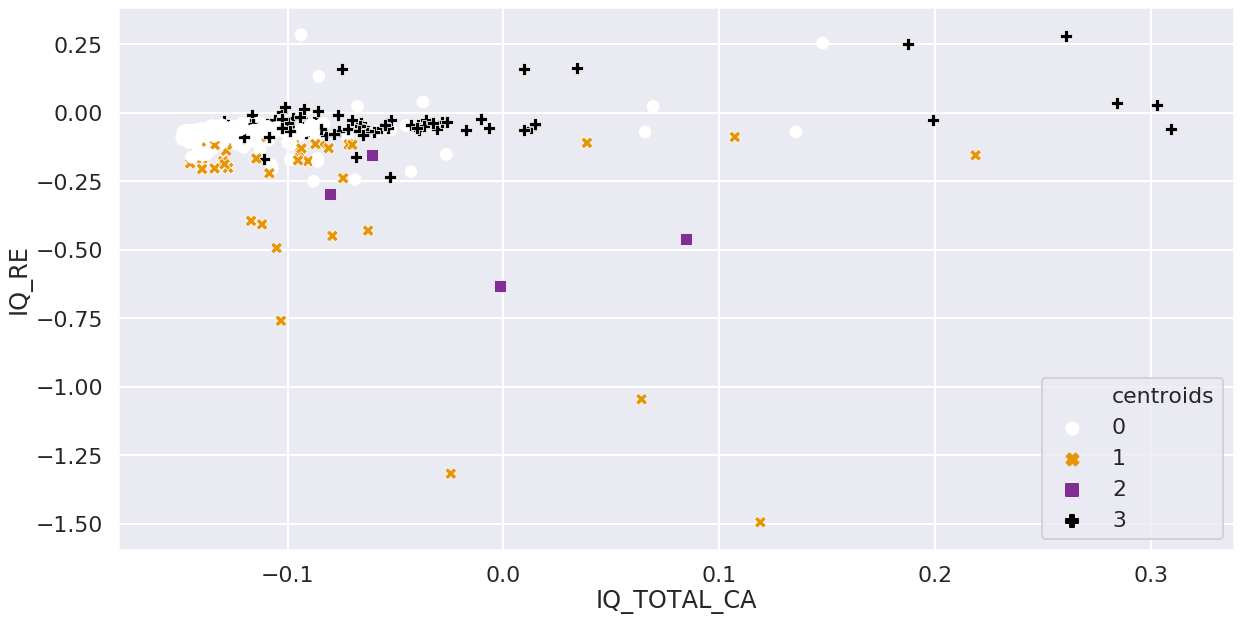

In [527]:
sns.set_context("poster")
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="IQ_TOTAL_CA", y="IQ_RE", hue="centroids",style = "centroids",palette =  "CMRmap_r",data = dataset_clust_new)

# Provide a dictionary to the palette argument
#ax = sns.scatterplot( x="IQ_EBIT", y="IQ_TOTAL_REV", data=dataset_choosen, fit_reg=False , hue = "centroids" , legend=False, palette=dict(0="#9b59b6", 1="#3498db", 2="#95a5a6" 3 = "#96a5B6"))
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
#sns.plt.show()

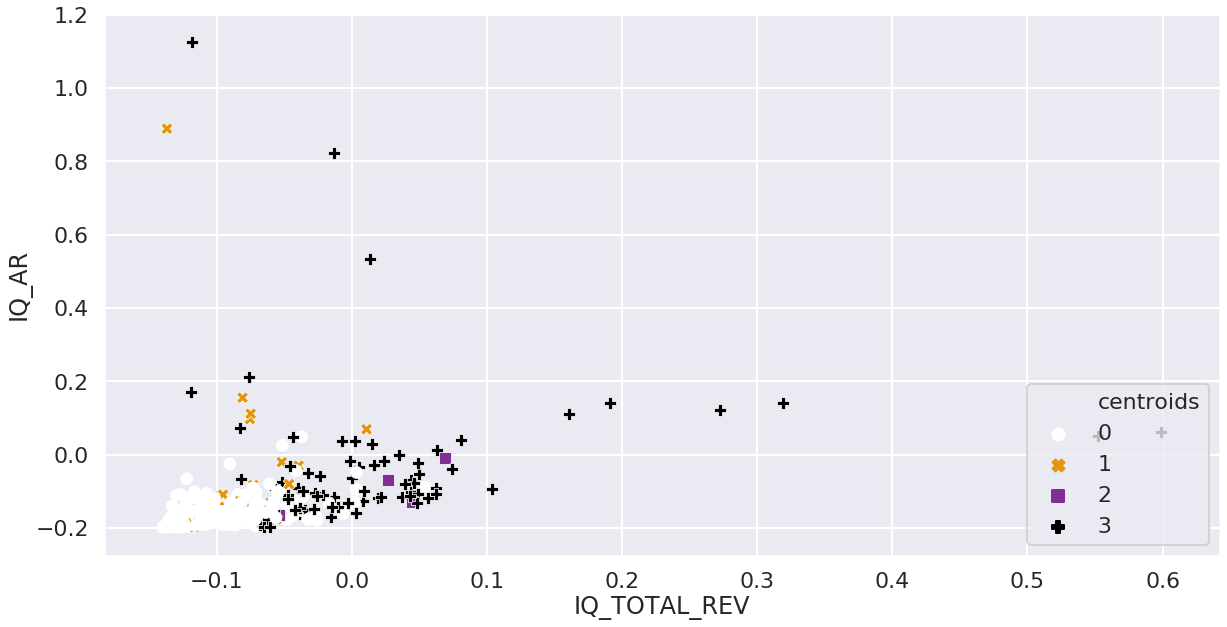

In [528]:
sns.set_context("poster")
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="IQ_TOTAL_REV", y="IQ_AR", hue="centroids",style = "centroids",palette =  "CMRmap_r",data = dataset_clust_new)

# Provide a dictionary to the palette argument
#ax = sns.scatterplot( x="IQ_EBIT", y="IQ_TOTAL_REV", data=dataset_choosen, fit_reg=False , hue = "centroids" , legend=False, palette=dict(0="#9b59b6", 1="#3498db", 2="#95a5a6" 3 = "#96a5B6"))
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
#sns.plt.show()

In [529]:
#Mix all the clusters 
for key in list(dict_index.keys()):
    dataset_scale.loc[key,'centroids']= dict_index[key]

In [530]:
dataset_scale.loc[dataset_scale['centroids']==5].head()

,company,year,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV,IQ_AR,IQ_RE,IQ_TOTAL_ASSETS,IQ_TOTAL_CA,centroids
272,IQ33210336,2016.0,-1.453065,0.180551,-1.453065,-0.054083,-0.165137,-0.295270,-0.067605,-0.080287,5
273,IQ33210336,2017.0,-2.412850,0.383477,-2.412850,0.044926,-0.129805,-0.458565,0.022289,0.084607,5
543,IQ154798,2018.0,-1.302051,0.583681,-1.302051,0.068855,-0.008410,-0.154505,-0.042495,-0.061012,5
599,IQ33210336,2018.0,-2.632563,0.424930,-2.632563,0.027085,-0.068533,-0.630454,0.008368,-0.001709,5


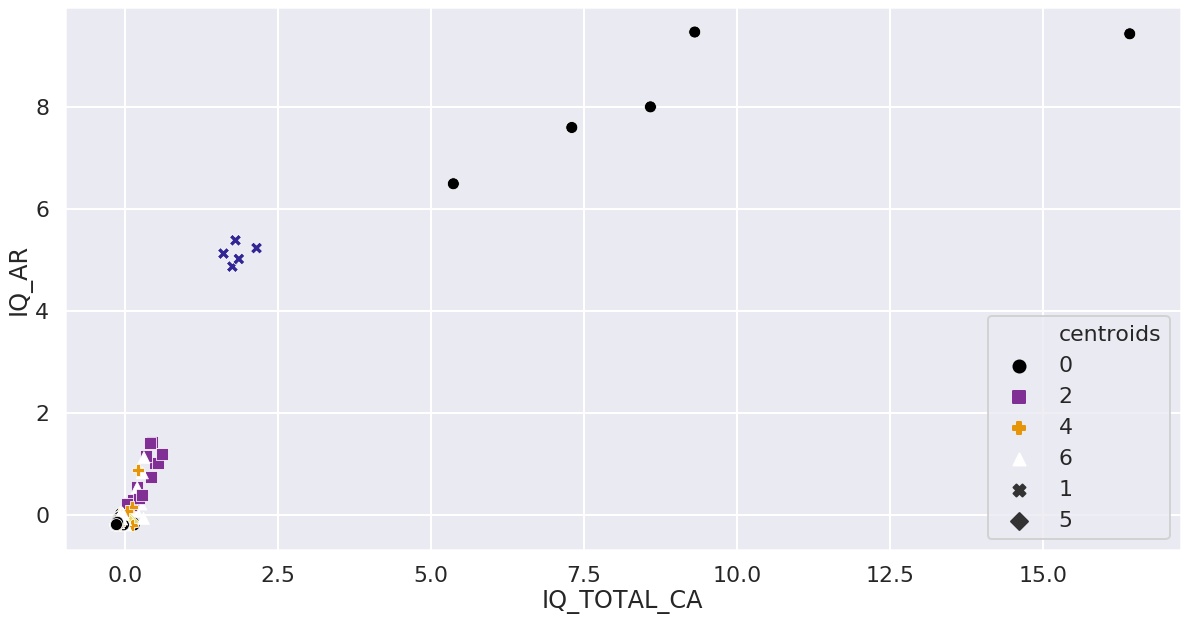

In [532]:
sns.set_context("poster")
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="IQ_TOTAL_CA", y="IQ_AR", hue="centroids",style = "centroids",palette =  "CMRmap",data = dataset_scale)

# Provide a dictionary to the palette argument
#ax = sns.scatterplot( x="IQ_EBIT", y="IQ_TOTAL_REV", data=dataset_choosen, fit_reg=False , hue = "centroids" , legend=False, palette=dict(0="#9b59b6", 1="#3498db", 2="#95a5a6" 3 = "#96a5B6"))
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
#sns.plt.show()

In [533]:
dataset_scale.head()

,company,year,IQ_EBIT,IQ_TOTAL_OTHER_OPER,IQ_OPER_INC,IQ_TOTAL_REV,IQ_AR,IQ_RE,IQ_TOTAL_ASSETS,IQ_TOTAL_CA,centroids
0,IQ102267046,2014.0,-0.052560,-0.134340,-0.052560,-0.129002,-0.160252,-0.067808,-0.118604,-0.136150,0
1,IQ102267046,2015.0,-0.057405,-0.127777,-0.057405,-0.123066,-0.141929,-0.067693,-0.116147,-0.129703,0
2,IQ102267046,2016.0,-0.046751,-0.114346,-0.046751,-0.107296,-0.105774,-0.066594,-0.111342,-0.117449,0
3,IQ105654219,2014.0,-0.058475,-0.130681,-0.058475,-0.126681,-0.187444,-0.066665,-0.119392,-0.139342,0
4,IQ105654219,2015.0,-0.054590,-0.127436,-0.054590,-0.124959,-0.187901,-0.065712,-0.118338,-0.137160,0


0.8667992047713717
[0.84375    0.86607143 0.79372197]
Accuracy score: 0.8809523809523809


/home/mbousso/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[Text(1209.0, 1956.96, 'X[4] <= 0.177\nentropy = 0.629\nsamples = 503\nvalue = [[224.297, 9.772]\n[187.628, 46.442]\n[188.279, 45.79]\n[190.048, 44.022]\n[187.535, 46.535]\n[192.561, 41.509]]'),
 Text(558.0, 1522.0800000000002, 'X[2] <= -0.936\nentropy = 0.506\nsamples = 480\nvalue = [[129.153, 9.674]\n[138.827, 0.0]\n[138.827, 0.0]\n[94.805, 44.022]\n[92.292, 46.535]\n[100.231, 38.596]]'),
 Text(372.0, 1087.2, 'entropy = 0.0\nsamples = 3\nvalue = [[46.535, 0.0]\n[46.535, 0.0]\n[46.535, 0.0]\n[46.535, 0.0]\n[0.0, 46.535]\n[46.535, 0.0]]'),
 Text(744.0, 1087.2, 'X[2] <= -0.124\nentropy = 0.411\nsamples = 477\nvalue = [[82.618, 9.674]\n[92.292, 0.0]\n[92.292, 0.0]\n[48.27, 44.022]\n[92.292, 0.0]\n[53.696, 38.596]]'),
 Text(372.0, 652.3200000000002, 'X[5] <= -0.087\nentropy = 0.038\nsamples = 58\nvalue = [[44.022, 0.687]\n[44.709, 0.0]\n[44.709, 0.0]\n[0.687, 44.022]\n[44.709, 0.0]\n[44.709, 0.0]]'),
 Text(186.0, 217.44000000000005, 'entropy = 0.019\nsamples = 42\nvalue = [[44.022, 0.295]

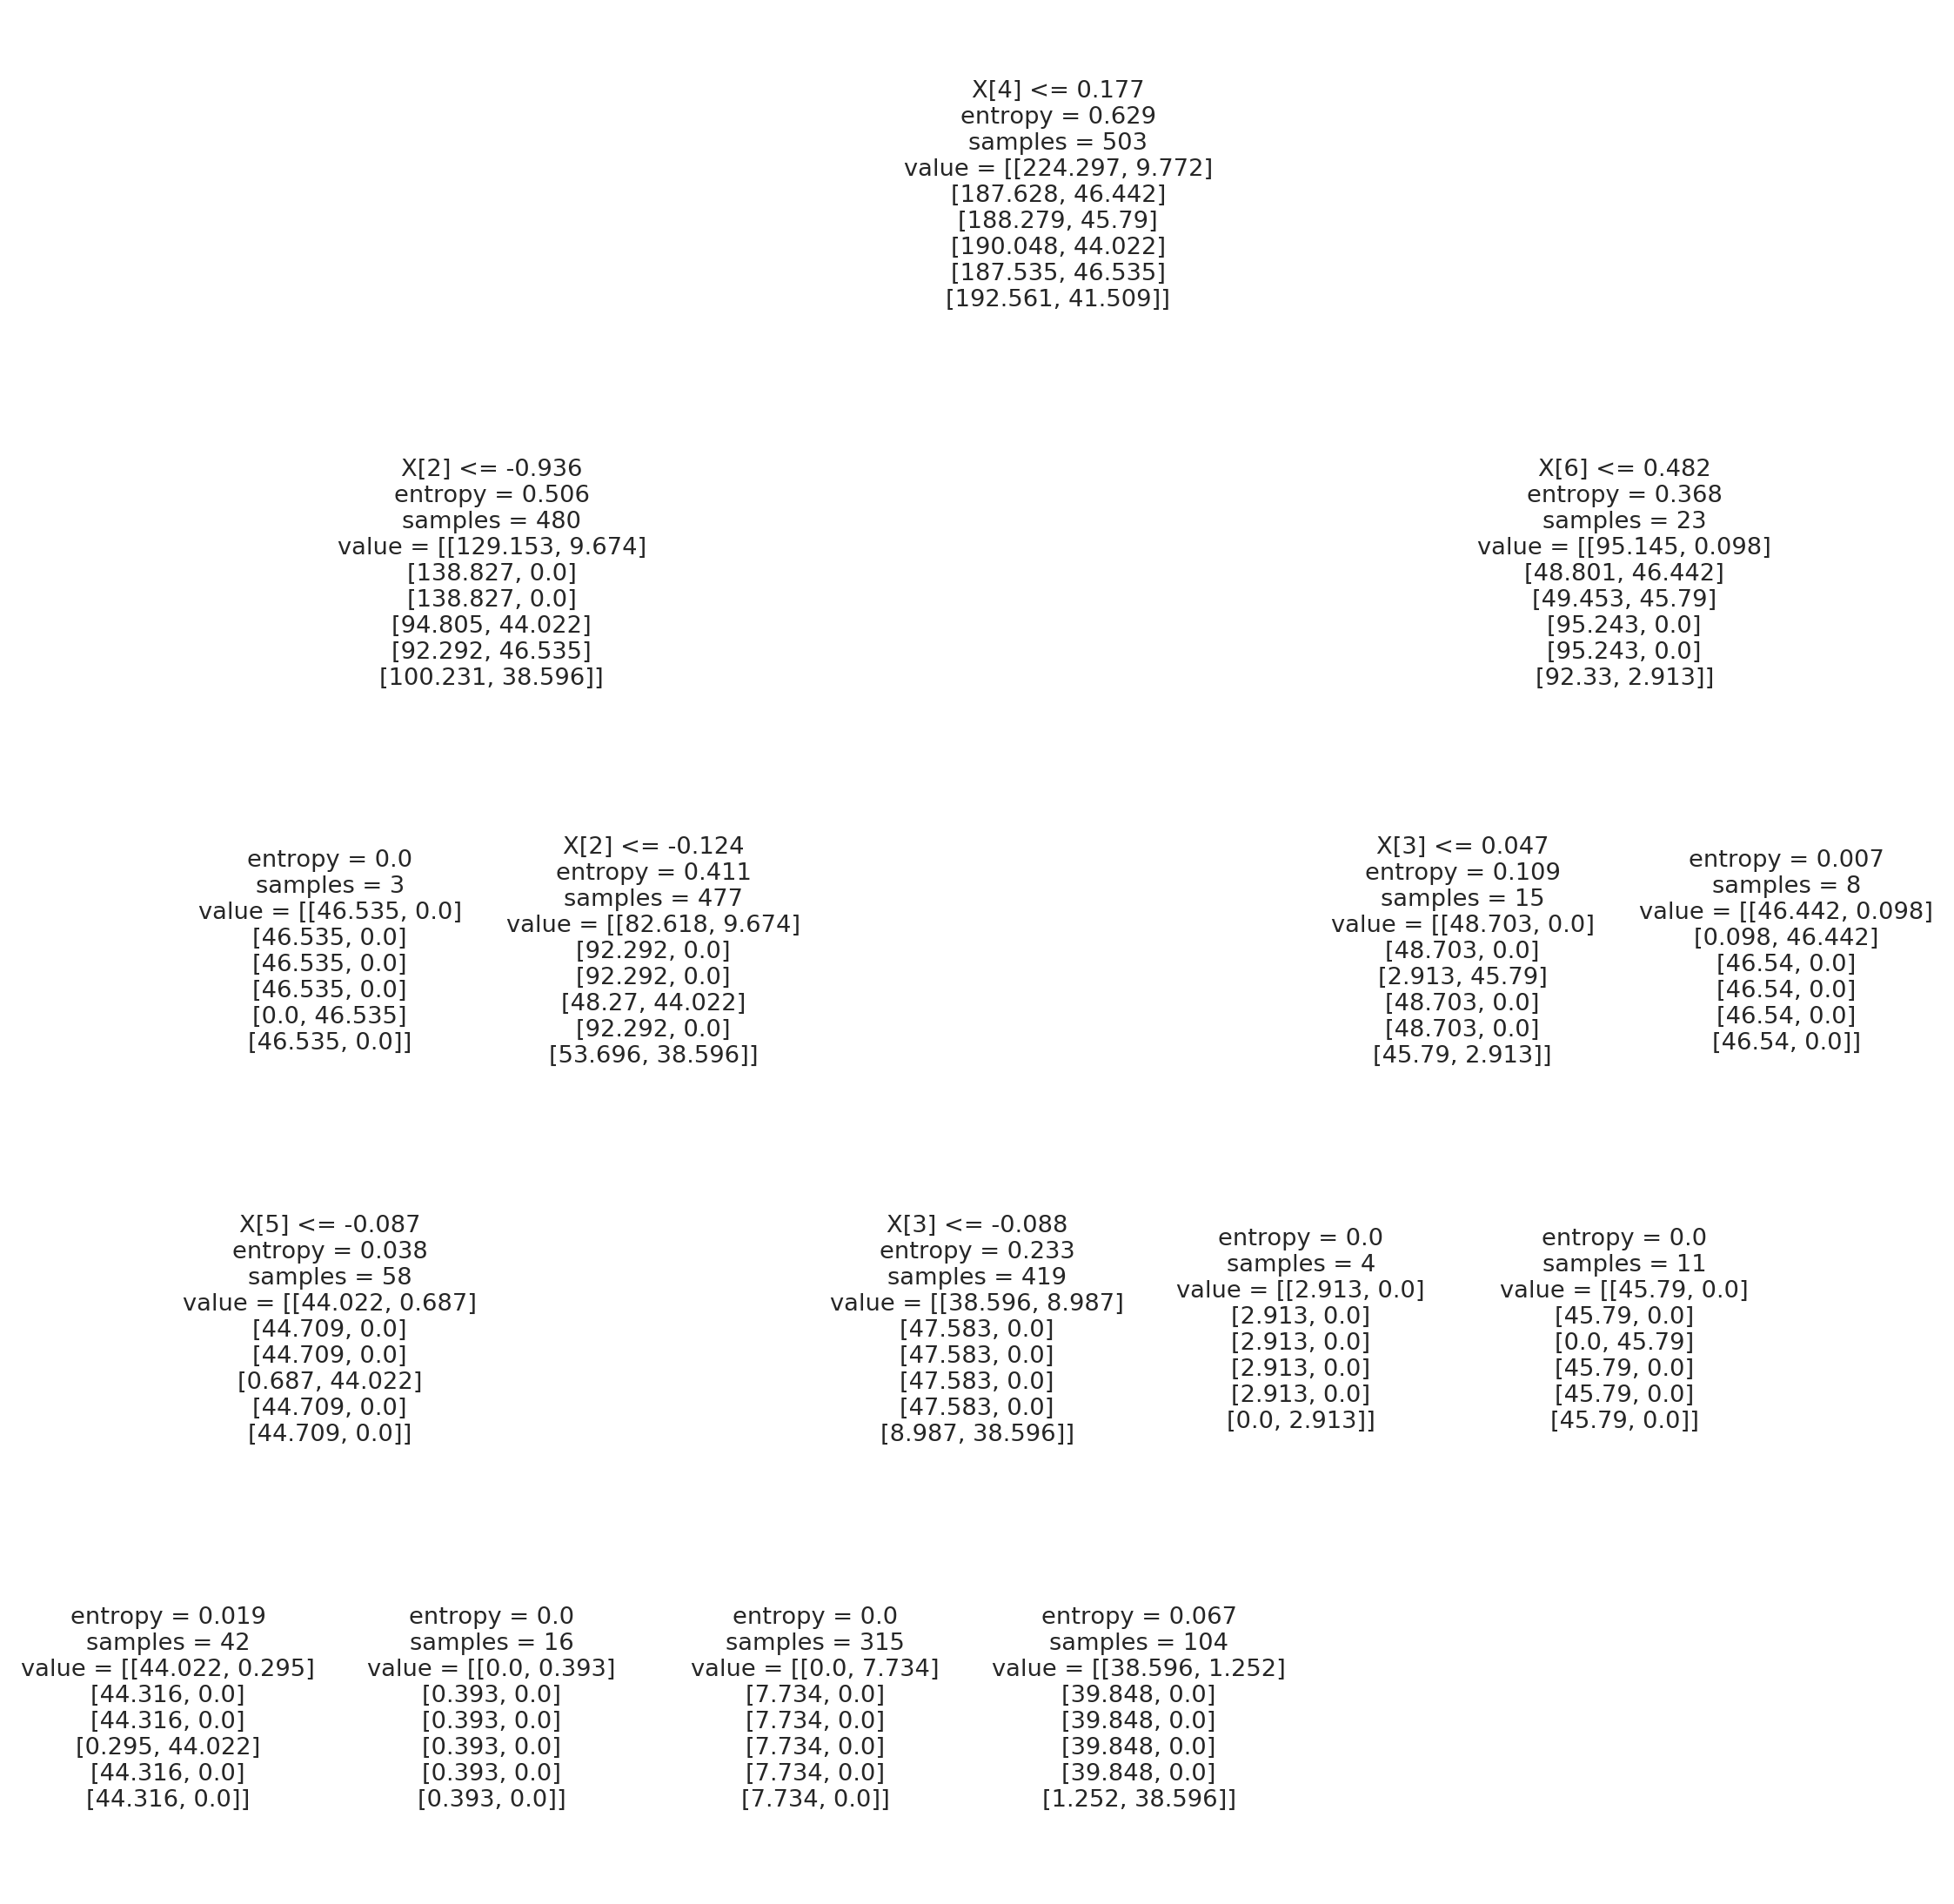

In [535]:
plt.rcParams["figure.figsize"]=40,40
X_scale_last  = dataset_scale.loc[:,"IQ_EBIT":"IQ_TOTAL_CA"]
y_scale_last = pd.get_dummies(dataset_scale.loc[:,"centroids"])
X_scale_train_new,X_scale_test_new,y_scale_train_new,y_scale_test_new = train_test_split(X_scale_last,y_scale_last,random_state=0)
clf = tree.DecisionTreeClassifier(class_weight="balanced",criterion = "entropy",max_leaf_nodes = 8,random_state = 0)
clf.fit(X_scale_train_new, y_scale_train_new)
print(clf.score(X_scale_train_new,y_scale_train_new))
print(cross_val_score(clf,X_scale_last,y_scale_last))

y_pred_new = clf.predict(X_scale_test_new)
print("Accuracy score:",  metrics.accuracy_score(y_scale_test_new,y_pred_new))
tree.plot_tree(clf) 

In [537]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names= dataset_scale.columns[2:10],  
                      class_names= dataset_scale.centroids,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render("decisiontreeincome2")

'decisiontreeincome2.pdf'

In [538]:
for i in range(7):
    print(i,len(dataset_scale[dataset_scale ["centroids"]== i]))


#sns.plt.show()

0 522
1 5
2 13
3 0
4 45
5 4
6 82
